In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import geopandas as gpd
import numpy as np
import plotly.graph_objects as go



# Cargar el archivo tmin.xlsx que contiene los municipios de cada estación
tmin_path = '../data/tmin.xlsx'
tmin_df = pd.read_excel(tmin_path)

# Cargar el archivo tmean.xlsx en el que queremos agregar la columna 'Municipio'
tmean_path = '../data/tmean.xlsx'
tmean_df = pd.read_excel(tmean_path)

# Realizar el merge para agregar la columna 'Municipio' al archivo tmean.xlsx usando 'CodigoEstacion'
estaciones_df = pd.merge(tmean_df, tmin_df[['CodigoEstacion', 'Municipio']], on='CodigoEstacion', how='left')
estaciones_df = estaciones_df.drop_duplicates()

In [2]:
# Cargar el archivo CSV con los reportes de delitos
csv_path = '../data/delitos.csv'
delitos_df = pd.read_csv(csv_path)

# Filtrar el departamento "Santander" y convertir fechas a formato datetime
santander_delitos_df = delitos_df[delitos_df['DEPARTAMENTO'] == 'SANTANDER']
santander_delitos_df['FECHA HECHO'] = pd.to_datetime(santander_delitos_df['FECHA HECHO'], dayfirst=True, infer_datetime_format=True)


# Agrupar los delitos por mes y municipio
delitos_mes_df = santander_delitos_df.groupby([santander_delitos_df['FECHA HECHO'].dt.to_period('M'), 'MUNICIPIO']).size().reset_index(name='casos')
delitos_mes_df['FECHA HECHO'] = delitos_mes_df['FECHA HECHO'].dt.to_timestamp()

/tmp/ipykernel_443007/1651751610.py:7: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  santander_delitos_df['FECHA HECHO'] = pd.to_datetime(santander_delitos_df['FECHA HECHO'], dayfirst=True, infer_datetime_format=True)
/tmp/ipykernel_443007/1651751610.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  santander_delitos_df['FECHA HECHO'] = pd.to_datetime(santander_delitos_df['FECHA HECHO'], dayfirst=True, infer_datetime_format=True)


In [3]:
estaciones_df

CodigoEstacion   Latitud   Longitud  Altitud      Fecha  Valor_max  \
0              23195502  7.121472 -73.184528     1189 2000-01-01  23.965188   
214            23195502  7.121472 -73.184528     1189 2000-02-01  24.037069   
428            23195502  7.121472 -73.184528     1189 2000-03-01  24.156183   
642            23195502  7.121472 -73.184528     1189 2000-04-01  24.881111   
856            23195502  7.121472 -73.184528     1189 2000-05-01  24.751049   
...                 ...       ...        ...      ...        ...        ...   
1240654        24055030  6.792778 -73.282750     1810 2024-06-01  24.594444   
1240885        24055030  6.792778 -73.282750     1810 2024-07-01  25.022043   
1241116        24055030  6.792778 -73.282750     1810 2024-08-01  24.841398   
1241347        24055030  6.792778 -73.282750     1810 2024-09-01  25.015000   
1241578        24055030  6.792778 -73.282750     1810 2024-10-01  24.392963   

         Valor_min  Valor_medio Municipio  
0        17.560887    20.763038   Lebrija  
214      17.985632    21.011351   Lebrija  
428      18.191250    21.173716   Lebrija  
642      18.677917    21.779514   Lebrija  
856      18.933286    21.842167   Lebrija  
...            ...          ...       ...  
1240654  14.843889    19.719167  Zapatoca  
1240885  14.602151    19.812097  Zapatoca  
1241116  14.027299    19.434348  Zapatoca  
1241347  13.905833    19.460417  Zapatoca  
1241578  14.337366    19.365165  Zapatoca  

[5203 rows x 9 columns]

In [4]:
delitos_mes_df

FECHA HECHO            MUNICIPIO  casos
0     2003-01-01          BUCARAMANGA      2
1     2003-02-01        FLORIDABLANCA      1
2     2003-04-01      BARRANCABERMEJA      1
3     2003-07-01      BARRANCABERMEJA      1
4     2003-07-01              LEBRIJA      1
...          ...                  ...    ...
2242  2024-09-01     SABANA DE TORRES      5
2243  2024-09-01              SAN GIL      1
2244  2024-09-01  SAN JOSE DE MIRANDA      1
2245  2024-09-01              SOCORRO      2
2246  2024-09-01                VELEZ      1

[2247 rows x 3 columns]

In [5]:
estaciones_df.rename(columns={'MUNICIPIO': 'Municipio'}, inplace=True)
delitos_mes_df.rename(columns={'FECHA HECHO': 'Fecha'}, inplace=True)
delitos_mes_df.rename(columns={'MUNICIPIO': 'Municipio'}, inplace=True)

# Estandarizar los nombres de municipios en minúsculas en ambos DataFrames
estaciones_df['Municipio'] = estaciones_df['Municipio'].str.lower()
delitos_mes_df['Municipio'] = delitos_mes_df['Municipio'].str.lower()

# Realizar el merge en base a las columnas de fecha y municipio
merged_df = pd.merge(estaciones_df, delitos_mes_df, left_on=['Fecha', 'Municipio'], right_on=['Fecha', 'Municipio'], how='inner')

# Verificar el resultado
print(merged_df.head())

   CodigoEstacion   Latitud   Longitud  Altitud      Fecha  Valor_max  \
0        23195502  7.121472 -73.184528     1189 2003-07-01  25.412097   
1        23195502  7.121472 -73.184528     1189 2004-02-01  26.214943   
2        23195502  7.121472 -73.184528     1189 2008-08-01  25.710618   
3        23195502  7.121472 -73.184528     1189 2009-09-01  27.496806   
4        23195502  7.121472 -73.184528     1189 2012-02-01  26.012356   

   Valor_min  Valor_medio Municipio  casos  
0  18.489382    21.950739   lebrija      1  
1  18.770115    22.492529   lebrija      1  
2  18.020968    21.865793   lebrija      1  
3  18.988611    23.242708   lebrija      1  
4  18.295977    22.154167   lebrija      1  


In [6]:
estaciones_df['Municipio'].unique()

array(['lebrija', 'barrancabermeja', 'albania', 'tona', 'suratá',
       'puerto parra', 'capitanejo', 'el carmen', 'charalá', 'chima',
       'cimitarra', 'pinchote', 'mogotes', 'gámbita', 'puerto wilches',
       'socorro', 'guadalupe', 'landázuri', 'girón', 'palmar', 'cerrito',
       'bucaramanga', 'vélez', 'sabana de torres', 'zapatoca'],
      dtype=object)

In [7]:
delitos_mes_df['Municipio'].unique()

array(['bucaramanga', 'floridablanca', 'barrancabermeja', 'lebrija',
       'socorro', 'sabana de torres', 'san gil', 'onzaga', 'suaita',
       'giron', 'matanza', 'el playon', 'el carmen de chucuri',
       'zapatoca', 'piedecuesta', 'chipata', 'betulia', 'rionegro',
       'cimitarra', 'puerto wilches', 'charala', 'la paz', 'barbosa',
       'california', 'gambita', 'san andres', 'simacota', 'los santos',
       'san vicente de chucuri', 'aratoca', 'valle de san jose',
       'pinchote', 'barichara', 'puerto parra', 'florian', 'enciso',
       'confines', 'galan', 'bolivar', 'jesus maria', 'villanueva',
       'ocamonte', 'san jose de miranda', 'surata', 'cerrito', 'el peñon',
       'oiba', 'concepcion', 'mogotes', 'velez', 'landazuri', 'aguada',
       'guadalupe', 'encino', 'chima', 'capitanejo',
       'santa helena del opon', 'malaga', 'puente nacional', 'vetas',
       'guavata', 'paramo', 'san miguel', 'santa barbara', 'el guacamayo',
       'palmas del socorro', 'coromoro', 

In [8]:
merged_df = merged_df[['Municipio','Latitud','Longitud','Fecha','casos']]
merged_df

Municipio   Latitud   Longitud      Fecha  casos
0     lebrija  7.121472 -73.184528 2003-07-01      1
1     lebrija  7.121472 -73.184528 2004-02-01      1
2     lebrija  7.121472 -73.184528 2008-08-01      1
3     lebrija  7.121472 -73.184528 2009-09-01      1
4     lebrija  7.121472 -73.184528 2012-02-01      1
..        ...       ...        ...        ...    ...
515  zapatoca  6.792778 -73.282750 2007-02-01      1
516  zapatoca  6.792778 -73.282750 2011-03-01      1
517  zapatoca  6.792778 -73.282750 2016-02-01      1
518  zapatoca  6.792778 -73.282750 2016-05-01      2
519  zapatoca  6.792778 -73.282750 2021-04-01      1

[520 rows x 5 columns]

In [ ]:
merged_df.to_csv('../data/delitos/delitos_santander.csv', index=False)

In [14]:
casos_por_municipio = merged_df.groupby(['Municipio', 'Latitud', 'Longitud'])['casos'].sum().reset_index()
casos_por_municipio['Municipio'] = casos_por_municipio['Municipio'].str.capitalize()
casos_por_municipio

Municipio   Latitud   Longitud  casos
0            Albania  5.758333 -73.913333      3
1    Barrancabermeja  6.859556 -73.765083    257
2    Barrancabermeja  7.026389 -73.808611    508
3        Bucaramanga  7.144722 -73.122222      2
4         Capitanejo  6.520722 -72.696611     24
5            Cerrito  6.845278 -72.677778      8
6              Chima  6.355000 -73.368333      6
7          Cimitarra  6.308611 -73.952222    219
8          Guadalupe  6.237167 -73.415389      7
9            Lebrija  7.121472 -73.184528     31
10           Mogotes  6.470000 -72.968889     19
11            Palmar  6.549722 -73.292000      1
12      Puerto parra  6.649444 -74.061389     22
13    Puerto wilches  7.246111 -73.790000      3
14  Sabana de torres  7.456111 -73.537222    186
15           Socorro  6.471806 -73.248583      3
16              Tona  7.186944 -72.868611     12
17          Zapatoca  6.792778 -73.282750      7

In [15]:
casos_por_municipio.to_csv('../data/delitos/delitos_santander_total.csv', index=False)

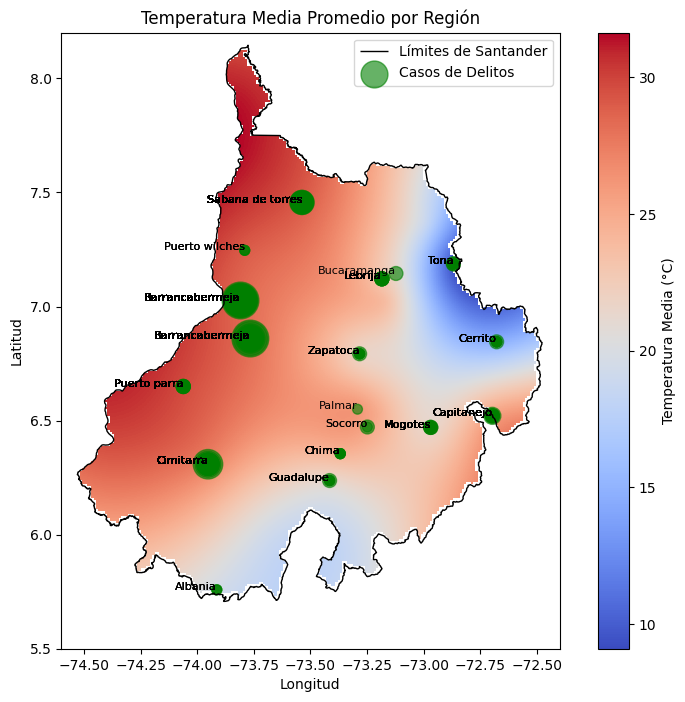

In [7]:
# Ruta de los archivos .npy
npy_folder_path = '../data/tmean_interp_final/npy/*.npy'
npy_files = glob.glob(npy_folder_path)

# Inicializar una matriz acumuladora para la suma de todas las matrices de 700x300
sum_matrix = None

# Cargar y sumar todas las matrices npy
for file in npy_files:
    data = np.load(file)
    if sum_matrix is None:
        sum_matrix = data
    else:
        sum_matrix += data

# Calcular la media dividiendo la suma por el número de archivos
mean_temperature_matrix = sum_matrix / len(npy_files)


# Cargar el archivo de límites administrativos de Colombia con Geopandas
colombia_shapefile = '../data/aoi/Departamento.shp'  # Archivo SHP o GeoJSON con límites de municipios
gdf = gpd.read_file(colombia_shapefile)

# Reproyectar los datos geográficos a WGS84 (EPSG:4326)
if gdf.crs != "EPSG:4326":
    gdf = gdf.to_crs("EPSG:4326")

# Filtrar para mostrar solo el departamento de Santander
santander_gdf = gdf[gdf['DeNombre'] == 'Santander']  # Asegúrate de que coincida con el nombre en el archivo

# Definir la región de límites (longitud mínima, longitud máxima, latitud mínima, latitud máxima)
region = (-74.6, -72.4, 5.5, 8.2)

# Crear el mapa de temperatura promedio
plt.figure(figsize=(10, 8))
extent = [region[0], region[1], region[2], region[3]]
mask = np.load("../data/mask.npy")
plt.imshow(mean_temperature_matrix * mask, extent=extent, origin='lower', cmap='coolwarm', aspect='auto')
plt.colorbar(label='Temperatura Media (°C)')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.title('Temperatura Media Promedio por Región')

santander_gdf.boundary.plot(ax=plt.gca(), linewidth=1, edgecolor="black", label="Límites de Santander")
# Graficar los puntos de delitos como scatter plot
plt.scatter(
    merged_df['Longitud'], merged_df['Latitud'],
    c='green', s=merged_df['casos']*50, alpha=0.6, label='Casos de Delitos'
)

# Agregar el nombre de cada municipio en el plot con la primera letra en mayúscula
for i, row in merged_df.iterrows():
    municipio_nombre = row['Municipio'].capitalize()  # Capitalizar solo la primera letra
    plt.text(row['Longitud'], row['Latitud'], municipio_nombre, fontsize=8, ha='right', color='black')

plt.legend()
plt.savefig('../data/delitos/delitos_temp_santander.png', bbox_inches='tight', dpi=400)
plt.show()

In [ ]:
np.save('../data/delitos/temperatura_mean.npy',mean_temperature_matrix)

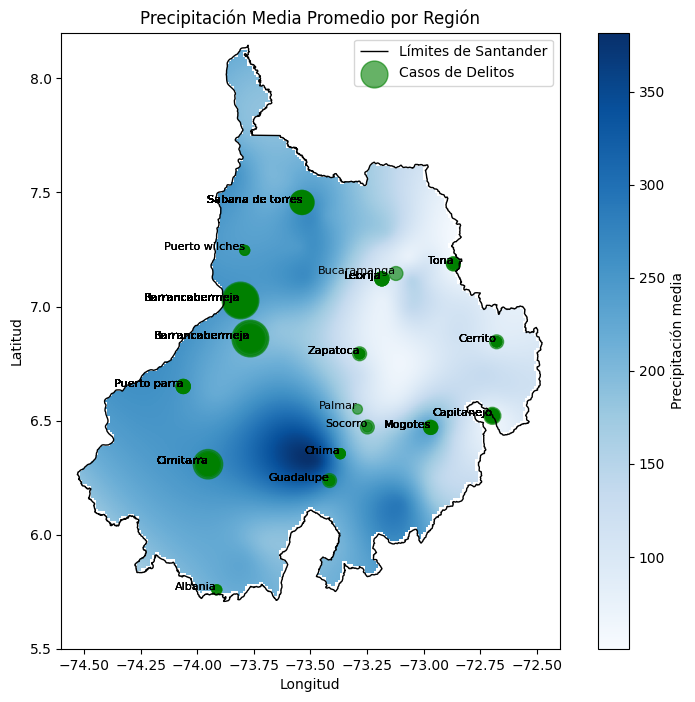

In [9]:
# Ruta de los archivos .npy
npy_folder_path = '../data/precipitacion_interp_final/npy/*.npy'
npy_files = glob.glob(npy_folder_path)

# Inicializar una matriz acumuladora para la suma de todas las matrices de 700x300
sum_matrix = None

# Cargar y sumar todas las matrices npy
for file in npy_files:
    data = np.load(file)
    if sum_matrix is None:
        sum_matrix = data
    else:
        sum_matrix += data

# Calcular la media dividiendo la suma por el número de archivos
mean_precipitacion_matrix = sum_matrix / len(npy_files)

# Crear el mapa de temperatura promedio
plt.figure(figsize=(10, 8))
extent = [region[0], region[1], region[2], region[3]]
plt.imshow(mean_precipitacion_matrix * mask, extent=extent, origin='lower', cmap='Blues', aspect='auto')
plt.colorbar(label='Precipitación media')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.title('Precipitación Media Promedio por Región')

# Dibujar los límites de Santander
santander_gdf.boundary.plot(ax=plt.gca(), linewidth=1, edgecolor="black", label="Límites de Santander")

# Graficar los puntos de delitos como scatter plot
plt.scatter(
    merged_df['Longitud'], merged_df['Latitud'],
    c='green', s=merged_df['casos']*50, alpha=0.6, label='Casos de Delitos'
)

# Agregar el nombre de cada municipio en el plot con la primera letra en mayúscula
for i, row in merged_df.iterrows():
    municipio_nombre = row['Municipio'].capitalize()  # Capitalizar solo la primera letra
    plt.text(row['Longitud'], row['Latitud'], municipio_nombre, fontsize=8, ha='right', color='black')

plt.legend()
plt.savefig('../data/delitos/delitos_prec_santander.png', bbox_inches='tight',dpi=400)
plt.show()

In [ ]:
np.save('../data/delitos/precipitacion_mean.npy',mean_precipitacion_matrix)

In [ ]:
# Crear el mapa de temperatura promedio
fig = go.Figure()

# Agregar la matriz de temperatura media como imagen de fondo
fig.add_trace(
    go.Heatmap(
        z=mean_precipitacion_matrix,
        x=[region[0], region[1]],  # Coordenadas en longitud
        y=[region[2], region[3]],  # Coordenadas en latitud
        colorscale='Blues',
        colorbar=dict(title='Indice de Precipitación'),
        zmin=mean_precipitacion_matrix.min(),
        zmax=mean_precipitacion_matrix.max()
    )
)

# Dibujar límites de Santander (suponiendo que tienes las coordenadas en santander_gdf)
# Puedes usar una `Scatter` lineal con las coordenadas de los límites
for geom in santander_gdf.geometry:
    x, y = geom.exterior.xy
    fig.add_trace(go.Scatter(x=list(x), y=list(y), mode='lines', line=dict(color='black'), name="Límites de Santander"))

# Agregar puntos de delitos
fig.add_trace(
    go.Scatter(
        x=merged_df['Longitud'],
        y=merged_df['Latitud'],
        mode='markers+text',
        marker=dict(
            size=merged_df['casos'],  # Aumentar tamaño de puntos
            color='green',
            opacity=0.6
        ),
        text=merged_df['Municipio'].str.capitalize(),  # Capitalizar nombres
        textposition='top right',
        name='Casos de Delitos'
    )
)

# Configurar el layout
fig.update_layout(
    title='Precipitación Media Promedio por Región',
    xaxis=dict(title='Longitud', range=[region[0], region[1]]),
    yaxis=dict(title='Latitud', range=[region[2], region[3]]),
    showlegend=True
)

fig.show()